In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.datasets import load_breast_cancer

# 'eig' from numpy.linalg to calculate eigenvalues and eigenvectors
from numpy.linalg import eig

# 'PCA' function to perform principal component analysis using the sklearn library
from sklearn.decomposition import PCA

# 'LDA' function to perform linear discriminant analysis using the sklearn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# import decision tree classifier from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

Renting a house or an apartment is never easy. Whether you are a college student or a working professional, renting a place always seems like a daunting task that is often impulsive or risky. Rent is influenced by several factors.

In this challenge, participants will predict the house-rents using data science methods, machine learning, and hyperparameter tuning.

The challenge will start on May 12, 2022 and run till May 31, 2022. 

In [3]:
train=pd.read_csv("~/Downloads/train.csv")
test=pd.read_csv("~/Downloads/test.csv")

In [4]:
#cd

In [5]:
#os.getcwd()

In [6]:
#import os 
#cwd = os.getcwd () 

In [7]:
#wd

In [8]:
train.head()

,Property_ID,room,layout_type,property_type,locality,price,area,furnish_type,bathroom,city,...,floor,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood
0,42208,3,BHK,Independent House,Palavakkam,33624,1312,Furnished,2,Chennai,...,1,1,0,0,1,0,302616,0,0,300
1,90879,1,BHK,Apartment,Manikonda,9655,1474,Unfurnished,2,Hyderabad,...,17,0,1,0,0,1,19310,0,1,1600
2,99943,3,BHK,Apartment,Jodhpur Park,23699,1837,Semi-Furnished,2,Kolkata,...,10,1,1,1,1,0,118495,0,1,3100
3,113926,1,BHK,Apartment,Chembur,6306,606,Unfurnished,1,Mumbai,...,18,0,0,0,0,0,37836,0,1,300
4,185438,1,BHK,Studio Apartment,Kalewadi Pandhapur Road,12008,498,Semi-Furnished,3,Pune,...,14,0,0,1,1,0,72048,0,1,0


In [9]:
# Base Model
test["price"]=train.price.mean()
solution=pd.DataFrame({"price":test["price"]})

In [10]:
solution

,price
0,36690.033894
1,36690.033894
2,36690.033894
3,36690.033894
4,36690.033894
...,...
57717,36690.033894
57718,36690.033894
57719,36690.033894
57720,36690.033894


In [11]:
solution.to_csv("Basemodel.csv",index=False) # 60600.51196 RMSE

In [12]:
cd

C:\Users\DIVYANSHU RAJ


In [13]:
train.isnull().sum()

Property_ID         0
room                0
layout_type         0
property_type       0
locality            0
price               0
area                0
furnish_type        0
bathroom            0
city                0
parking_spaces      0
floor               0
pet_friendly        0
power_backup        0
washing_machine     0
air_conditioner     0
geyser/solar        0
security_deposit    0
CCTV/security       0
lift                0
neighbourhood       0
dtype: int64

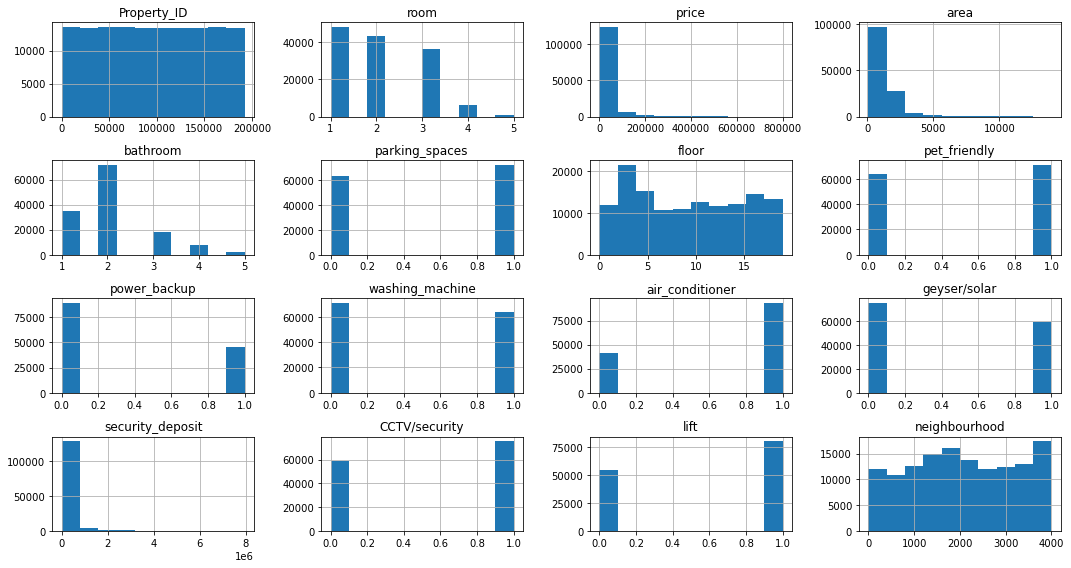

In [14]:
plt.rcParams['figure.figsize'] = [15, 8]
train.hist()
plt.tight_layout()
plt.show()

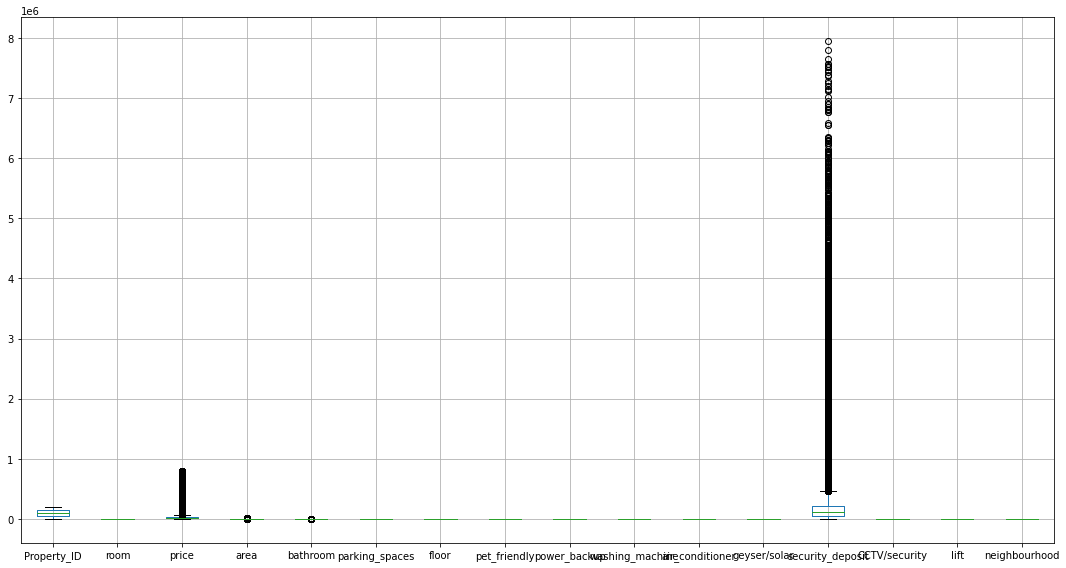

In [15]:
plt.rcParams['figure.figsize'] = [15, 8]
train.boxplot()
plt.tight_layout()
plt.show()

In [16]:
#EDA

In [17]:
test.drop("price",axis=1,inplace=True)
combined=pd.concat([train,test],ignore_index=True)

In [18]:
combined

,Property_ID,room,layout_type,property_type,locality,price,area,furnish_type,bathroom,city,...,floor,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood
0,42208,3,BHK,Independent House,Palavakkam,33624.0,1312,Furnished,2,Chennai,...,1,1,0,0,1,0,302616,0,0,300
1,90879,1,BHK,Apartment,Manikonda,9655.0,1474,Unfurnished,2,Hyderabad,...,17,0,1,0,0,1,19310,0,1,1600
2,99943,3,BHK,Apartment,Jodhpur Park,23699.0,1837,Semi-Furnished,2,Kolkata,...,10,1,1,1,1,0,118495,0,1,3100
3,113926,1,BHK,Apartment,Chembur,6306.0,606,Unfurnished,1,Mumbai,...,18,0,0,0,0,0,37836,0,1,300
4,185438,1,BHK,Studio Apartment,Kalewadi Pandhapur Road,12008.0,498,Semi-Furnished,3,Pune,...,14,0,0,1,1,0,72048,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192400,132027,3,BHK,Apartment,Dadar West,NaN,1628,Semi-Furnished,2,Mumbai,...,4,0,0,1,1,0,77049,0,0,2900
192401,86405,1,BHK,Apartment,Kondapur,NaN,729,Unfurnished,1,Hyderabad,...,3,1,0,0,0,0,29074,1,0,3100
192402,16233,3,RK,Independent Floor,Chandkheda,NaN,897,Furnished,3,Ahmedabad,...,8,1,1,0,1,1,188088,1,1,1100
192403,63020,3,BHK,Independent Floor,Uttam Nagar,NaN,2229,Unfurnished,1,Delhi,...,0,1,1,0,0,0,103938,0,0,1500


In [19]:
combined.shape

(192405, 21)

In [20]:
combined.layout_type.unique()

array(['BHK', 'RK'], dtype=object)

In [21]:
combined.layout_type.value_counts()

BHK    164037
RK      28368
Name: layout_type, dtype: int64

In [22]:
combined.property_type.unique()

array(['Independent House', 'Apartment', 'Studio Apartment',
       'Independent Floor', 'Villa', 'Penthouse'], dtype=object)

In [23]:
combined.property_type.value_counts()

Apartment            124091
Independent Floor     36785
Independent House     19173
Studio Apartment       8247
Villa                  3401
Penthouse               708
Name: property_type, dtype: int64

In [24]:
combined["neighbourhood"]=combined["neighbourhood"]/1000

In [25]:
combined

,Property_ID,room,layout_type,property_type,locality,price,area,furnish_type,bathroom,city,...,floor,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood
0,42208,3,BHK,Independent House,Palavakkam,33624.0,1312,Furnished,2,Chennai,...,1,1,0,0,1,0,302616,0,0,0.3
1,90879,1,BHK,Apartment,Manikonda,9655.0,1474,Unfurnished,2,Hyderabad,...,17,0,1,0,0,1,19310,0,1,1.6
2,99943,3,BHK,Apartment,Jodhpur Park,23699.0,1837,Semi-Furnished,2,Kolkata,...,10,1,1,1,1,0,118495,0,1,3.1
3,113926,1,BHK,Apartment,Chembur,6306.0,606,Unfurnished,1,Mumbai,...,18,0,0,0,0,0,37836,0,1,0.3
4,185438,1,BHK,Studio Apartment,Kalewadi Pandhapur Road,12008.0,498,Semi-Furnished,3,Pune,...,14,0,0,1,1,0,72048,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192400,132027,3,BHK,Apartment,Dadar West,NaN,1628,Semi-Furnished,2,Mumbai,...,4,0,0,1,1,0,77049,0,0,2.9
192401,86405,1,BHK,Apartment,Kondapur,NaN,729,Unfurnished,1,Hyderabad,...,3,1,0,0,0,0,29074,1,0,3.1
192402,16233,3,RK,Independent Floor,Chandkheda,NaN,897,Furnished,3,Ahmedabad,...,8,1,1,0,1,1,188088,1,1,1.1
192403,63020,3,BHK,Independent Floor,Uttam Nagar,NaN,2229,Unfurnished,1,Delhi,...,0,1,1,0,0,0,103938,0,0,1.5


In [26]:
combined.neighbourhood.describe()

count    192405.000000
mean          2.030429
std           1.160943
min           0.000000
25%           1.100000
50%           2.000000
75%           3.000000
max           4.000000
Name: neighbourhood, dtype: float64

In [27]:
# Distance<1:Proximity, Distance<2:Vicinity,Far

In [28]:
def dist(x):

#for i in combined["neighbourhood"]:
    if (x<1):
        return("Near")
    elif(x<2):
        return("Medium")
    else:
        return("Far")

In [29]:
combined["distance"]=combined["neighbourhood"]

In [30]:
combined.drop("neighbourhood",axis=1,inplace=True)

In [31]:
combined

,Property_ID,room,layout_type,property_type,locality,price,area,furnish_type,bathroom,city,...,floor,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,distance
0,42208,3,BHK,Independent House,Palavakkam,33624.0,1312,Furnished,2,Chennai,...,1,1,0,0,1,0,302616,0,0,0.3
1,90879,1,BHK,Apartment,Manikonda,9655.0,1474,Unfurnished,2,Hyderabad,...,17,0,1,0,0,1,19310,0,1,1.6
2,99943,3,BHK,Apartment,Jodhpur Park,23699.0,1837,Semi-Furnished,2,Kolkata,...,10,1,1,1,1,0,118495,0,1,3.1
3,113926,1,BHK,Apartment,Chembur,6306.0,606,Unfurnished,1,Mumbai,...,18,0,0,0,0,0,37836,0,1,0.3
4,185438,1,BHK,Studio Apartment,Kalewadi Pandhapur Road,12008.0,498,Semi-Furnished,3,Pune,...,14,0,0,1,1,0,72048,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192400,132027,3,BHK,Apartment,Dadar West,NaN,1628,Semi-Furnished,2,Mumbai,...,4,0,0,1,1,0,77049,0,0,2.9
192401,86405,1,BHK,Apartment,Kondapur,NaN,729,Unfurnished,1,Hyderabad,...,3,1,0,0,0,0,29074,1,0,3.1
192402,16233,3,RK,Independent Floor,Chandkheda,NaN,897,Furnished,3,Ahmedabad,...,8,1,1,0,1,1,188088,1,1,1.1
192403,63020,3,BHK,Independent Floor,Uttam Nagar,NaN,2229,Unfurnished,1,Delhi,...,0,1,1,0,0,0,103938,0,0,1.5


In [32]:
combined.distance.value_counts()

3.9    8096
0.1    7479
1.8    5844
1.6    5767
1.7    5708
1.4    5561
1.5    5544
1.9    5500
2.0    5364
1.3    5290
3.6    5248
1.2    5104
3.5    5030
2.1    4873
3.4    4775
3.7    4731
1.0    4710
1.1    4710
2.2    4706
2.3    4639
0.9    4539
2.8    4403
2.9    4390
2.7    4387
3.0    4387
2.4    4383
3.1    4304
3.3    4296
3.2    4238
0.8    4226
0.7    4201
2.6    4122
2.5    4087
3.8    4064
0.4    3864
0.6    3769
0.3    3667
0.5    3553
0.2    3225
4.0    2862
0.0    2759
Name: distance, dtype: int64

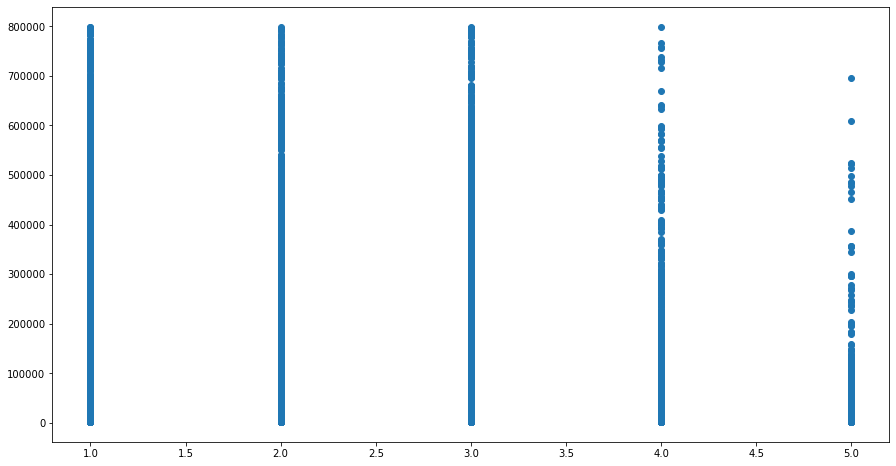

In [33]:
plt.scatter(train.room,train.price)

In [34]:
def rooms(x):
    if(x==1):
        return("Studio")
    elif(x<3):
        return("Small")
    else:
        return("Large")

In [35]:
combined["room_cat"]=combined["room"].apply(rooms)

In [36]:
combined.drop("room",axis=1,inplace=True)

In [37]:
combined

,Property_ID,layout_type,property_type,locality,price,area,furnish_type,bathroom,city,parking_spaces,...,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,distance,room_cat
0,42208,BHK,Independent House,Palavakkam,33624.0,1312,Furnished,2,Chennai,1,...,1,0,0,1,0,302616,0,0,0.3,Large
1,90879,BHK,Apartment,Manikonda,9655.0,1474,Unfurnished,2,Hyderabad,0,...,0,1,0,0,1,19310,0,1,1.6,Studio
2,99943,BHK,Apartment,Jodhpur Park,23699.0,1837,Semi-Furnished,2,Kolkata,0,...,1,1,1,1,0,118495,0,1,3.1,Large
3,113926,BHK,Apartment,Chembur,6306.0,606,Unfurnished,1,Mumbai,0,...,0,0,0,0,0,37836,0,1,0.3,Studio
4,185438,BHK,Studio Apartment,Kalewadi Pandhapur Road,12008.0,498,Semi-Furnished,3,Pune,0,...,0,0,1,1,0,72048,0,1,0.0,Studio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192400,132027,BHK,Apartment,Dadar West,NaN,1628,Semi-Furnished,2,Mumbai,1,...,0,0,1,1,0,77049,0,0,2.9,Large
192401,86405,BHK,Apartment,Kondapur,NaN,729,Unfurnished,1,Hyderabad,0,...,1,0,0,0,0,29074,1,0,3.1,Studio
192402,16233,RK,Independent Floor,Chandkheda,NaN,897,Furnished,3,Ahmedabad,1,...,1,1,0,1,1,188088,1,1,1.1,Large
192403,63020,BHK,Independent Floor,Uttam Nagar,NaN,2229,Unfurnished,1,Delhi,0,...,1,1,0,0,0,103938,0,0,1.5,Large


<AxesSubplot:xlabel='room_cat', ylabel='price'>

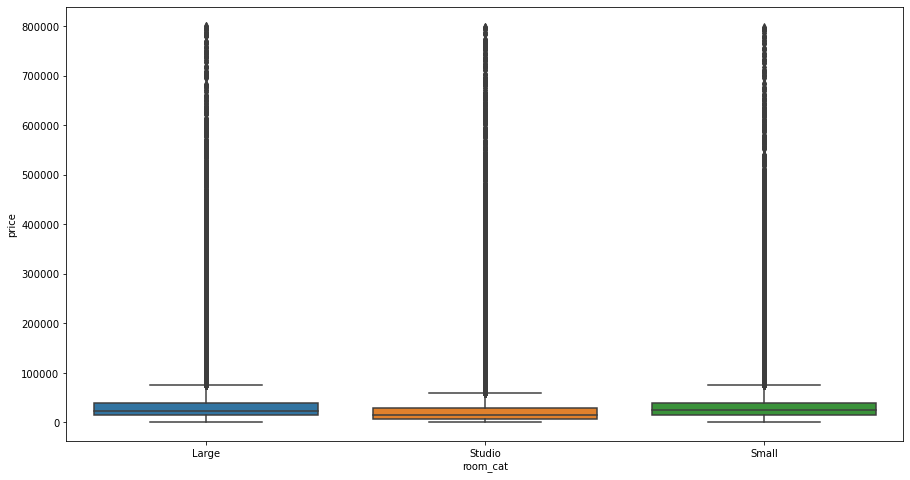

In [38]:
sns.boxplot(combined.room_cat,combined.price)

In [39]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192405 entries, 0 to 192404
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Property_ID       192405 non-null  int64  
 1   layout_type       192405 non-null  object 
 2   property_type     192405 non-null  object 
 3   locality          192405 non-null  object 
 4   price             134683 non-null  float64
 5   area              192405 non-null  int64  
 6   furnish_type      192405 non-null  object 
 7   bathroom          192405 non-null  int64  
 8   city              192405 non-null  object 
 9   parking_spaces    192405 non-null  int64  
 10  floor             192405 non-null  int64  
 11  pet_friendly      192405 non-null  int64  
 12  power_backup      192405 non-null  int64  
 13  washing_machine   192405 non-null  int64  
 14  air_conditioner   192405 non-null  int64  
 15  geyser/solar      192405 non-null  int64  
 16  security_deposit  19

parking_spaces',: 1 or 0  : 1 = Yes, 0 = No
'floor',: Floor from 0 to 20
'pet_friendly', : 1 or 0  : 1 = Yes, 0 = No
'power_backup', : 1 or 0  : 1 = Yes, 0 = No
'washing_machine',: 1 or 0  : 1 = Yes, 0 = No
'air_conditioner', : 1 or 0  : 1 = Yes, 0 = No
'geyser/solar',: 1 or 0  : 1 = Yes, 0 = No
'security_deposit', Amount of security Deposit
'neighborhood', : Nearest Metro/Bus/Mall in meters
'CCTV/security' : CCTV available 1 or 0  : 1 = Yes, 0 = No
'lift': 1 or 0  : 1 = Yes, 0 = No

In [40]:
# Let's convert 0 1 into Categories

combined["lift"]=combined.lift.astype("object")
combined["CCTV/security"]=combined["CCTV/security"].astype("object")
combined["geyser/solar"]=combined["geyser/solar"].astype("object")
combined["air_conditioner"]=combined["air_conditioner"].astype("object")
combined["washing_machine"]=combined["washing_machine"].astype("object")
combined["power_backup"]=combined["power_backup"].astype("object")
combined["pet_friendly"]=combined["pet_friendly"].astype("object")
combined["parking_spaces"]=combined["parking_spaces"].astype("object")


In [41]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192405 entries, 0 to 192404
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Property_ID       192405 non-null  int64  
 1   layout_type       192405 non-null  object 
 2   property_type     192405 non-null  object 
 3   locality          192405 non-null  object 
 4   price             134683 non-null  float64
 5   area              192405 non-null  int64  
 6   furnish_type      192405 non-null  object 
 7   bathroom          192405 non-null  int64  
 8   city              192405 non-null  object 
 9   parking_spaces    192405 non-null  object 
 10  floor             192405 non-null  int64  
 11  pet_friendly      192405 non-null  object 
 12  power_backup      192405 non-null  object 
 13  washing_machine   192405 non-null  object 
 14  air_conditioner   192405 non-null  object 
 15  geyser/solar      192405 non-null  object 
 16  security_deposit  19

In [42]:
combined.city.unique()

array(['Chennai', 'Hyderabad', 'Kolkata', 'Mumbai', 'Pune', 'Delhi',
       'Bangalore', 'Ahmedabad'], dtype=object)

In [43]:
north=["Delhi"]
west=["Mumbai","Ahmedabad","Pune"]
south=["Chennai","Bangalore","Hyderabad"]
east=["Kolkata"]

In [44]:
def city_c(x):
    if x in north:
        return("North")
    elif x in west:
        return("West")
    elif x in south:
        return("South")
    else:
        return("East")

In [45]:
combined["city_cat"]=combined["city"].apply(city_c)

In [46]:
combined

,Property_ID,layout_type,property_type,locality,price,area,furnish_type,bathroom,city,parking_spaces,...,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,distance,room_cat,city_cat
0,42208,BHK,Independent House,Palavakkam,33624.0,1312,Furnished,2,Chennai,1,...,0,0,1,0,302616,0,0,0.3,Large,South
1,90879,BHK,Apartment,Manikonda,9655.0,1474,Unfurnished,2,Hyderabad,0,...,1,0,0,1,19310,0,1,1.6,Studio,South
2,99943,BHK,Apartment,Jodhpur Park,23699.0,1837,Semi-Furnished,2,Kolkata,0,...,1,1,1,0,118495,0,1,3.1,Large,East
3,113926,BHK,Apartment,Chembur,6306.0,606,Unfurnished,1,Mumbai,0,...,0,0,0,0,37836,0,1,0.3,Studio,West
4,185438,BHK,Studio Apartment,Kalewadi Pandhapur Road,12008.0,498,Semi-Furnished,3,Pune,0,...,0,1,1,0,72048,0,1,0.0,Studio,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192400,132027,BHK,Apartment,Dadar West,NaN,1628,Semi-Furnished,2,Mumbai,1,...,0,1,1,0,77049,0,0,2.9,Large,West
192401,86405,BHK,Apartment,Kondapur,NaN,729,Unfurnished,1,Hyderabad,0,...,0,0,0,0,29074,1,0,3.1,Studio,South
192402,16233,RK,Independent Floor,Chandkheda,NaN,897,Furnished,3,Ahmedabad,1,...,1,0,1,1,188088,1,1,1.1,Large,West
192403,63020,BHK,Independent Floor,Uttam Nagar,NaN,2229,Unfurnished,1,Delhi,0,...,1,0,0,0,103938,0,0,1.5,Large,North


In [47]:
combined=combined.drop(['Property_ID','city'], axis = 1)

In [48]:
combined

,layout_type,property_type,locality,price,area,furnish_type,bathroom,parking_spaces,floor,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,distance,room_cat,city_cat
0,BHK,Independent House,Palavakkam,33624.0,1312,Furnished,2,1,1,1,0,0,1,0,302616,0,0,0.3,Large,South
1,BHK,Apartment,Manikonda,9655.0,1474,Unfurnished,2,0,17,0,1,0,0,1,19310,0,1,1.6,Studio,South
2,BHK,Apartment,Jodhpur Park,23699.0,1837,Semi-Furnished,2,0,10,1,1,1,1,0,118495,0,1,3.1,Large,East
3,BHK,Apartment,Chembur,6306.0,606,Unfurnished,1,0,18,0,0,0,0,0,37836,0,1,0.3,Studio,West
4,BHK,Studio Apartment,Kalewadi Pandhapur Road,12008.0,498,Semi-Furnished,3,0,14,0,0,1,1,0,72048,0,1,0.0,Studio,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192400,BHK,Apartment,Dadar West,NaN,1628,Semi-Furnished,2,1,4,0,0,1,1,0,77049,0,0,2.9,Large,West
192401,BHK,Apartment,Kondapur,NaN,729,Unfurnished,1,0,3,1,0,0,0,0,29074,1,0,3.1,Studio,South
192402,RK,Independent Floor,Chandkheda,NaN,897,Furnished,3,1,8,1,1,0,1,1,188088,1,1,1.1,Large,West
192403,BHK,Independent Floor,Uttam Nagar,NaN,2229,Unfurnished,1,0,0,1,1,0,0,0,103938,0,0,1.5,Large,North


In [49]:
combined["floor"]=combined["floor"].astype("object")

In [50]:
combined.floor.value_counts()

2     18065
3     12701
4     11712
17    11618
19    10248
1     10177
15     9997
5      9955
16     9302
10     8984
11     8808
18     8749
12     8500
6      8440
9      8217
13     8196
8      7507
14     7454
7      7031
0      6744
Name: floor, dtype: int64

In [51]:
floormap=pd.DataFrame(combined.floor.value_counts()/combined.floor.value_counts().sum()).reset_index()

In [52]:
floormap

,index,floor
0,2,0.093890
1,3,0.066012
2,4,0.060872
3,17,0.060383
4,19,0.053263
5,1,0.052894
6,15,0.051958
7,5,0.051740
8,16,0.048346
9,10,0.046693


In [53]:
floormap.rename(columns={"index":"floor", "floor":"percent"}, inplace = True)


In [54]:
combined = pd.merge(combined, floormap, on = "floor", how = "left")

In [55]:
pd.merge(combined, floormap, on =["floor"], how = "left")

,layout_type,property_type,locality,price,area,furnish_type,bathroom,parking_spaces,floor,pet_friendly,...,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,distance,room_cat,city_cat,percent_x,percent_y
0,BHK,Independent House,Palavakkam,33624.0,1312,Furnished,2,1,1,1,...,1,0,302616,0,0,0.3,Large,South,0.052894,0.052894
1,BHK,Apartment,Manikonda,9655.0,1474,Unfurnished,2,0,17,0,...,0,1,19310,0,1,1.6,Studio,South,0.060383,0.060383
2,BHK,Apartment,Jodhpur Park,23699.0,1837,Semi-Furnished,2,0,10,1,...,1,0,118495,0,1,3.1,Large,East,0.046693,0.046693
3,BHK,Apartment,Chembur,6306.0,606,Unfurnished,1,0,18,0,...,0,0,37836,0,1,0.3,Studio,West,0.045472,0.045472
4,BHK,Studio Apartment,Kalewadi Pandhapur Road,12008.0,498,Semi-Furnished,3,0,14,0,...,1,0,72048,0,1,0.0,Studio,West,0.038741,0.038741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192400,BHK,Apartment,Dadar West,NaN,1628,Semi-Furnished,2,1,4,0,...,1,0,77049,0,0,2.9,Large,West,0.060872,0.060872
192401,BHK,Apartment,Kondapur,NaN,729,Unfurnished,1,0,3,1,...,0,0,29074,1,0,3.1,Studio,South,0.066012,0.066012
192402,RK,Independent Floor,Chandkheda,NaN,897,Furnished,3,1,8,1,...,1,1,188088,1,1,1.1,Large,West,0.039017,0.039017
192403,BHK,Independent Floor,Uttam Nagar,NaN,2229,Unfurnished,1,0,0,1,...,0,0,103938,0,0,1.5,Large,North,0.035051,0.035051


In [56]:
combined

,layout_type,property_type,locality,price,area,furnish_type,bathroom,parking_spaces,floor,pet_friendly,...,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,distance,room_cat,city_cat,percent
0,BHK,Independent House,Palavakkam,33624.0,1312,Furnished,2,1,1,1,...,0,1,0,302616,0,0,0.3,Large,South,0.052894
1,BHK,Apartment,Manikonda,9655.0,1474,Unfurnished,2,0,17,0,...,0,0,1,19310,0,1,1.6,Studio,South,0.060383
2,BHK,Apartment,Jodhpur Park,23699.0,1837,Semi-Furnished,2,0,10,1,...,1,1,0,118495,0,1,3.1,Large,East,0.046693
3,BHK,Apartment,Chembur,6306.0,606,Unfurnished,1,0,18,0,...,0,0,0,37836,0,1,0.3,Studio,West,0.045472
4,BHK,Studio Apartment,Kalewadi Pandhapur Road,12008.0,498,Semi-Furnished,3,0,14,0,...,1,1,0,72048,0,1,0.0,Studio,West,0.038741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192400,BHK,Apartment,Dadar West,NaN,1628,Semi-Furnished,2,1,4,0,...,1,1,0,77049,0,0,2.9,Large,West,0.060872
192401,BHK,Apartment,Kondapur,NaN,729,Unfurnished,1,0,3,1,...,0,0,0,29074,1,0,3.1,Studio,South,0.066012
192402,RK,Independent Floor,Chandkheda,NaN,897,Furnished,3,1,8,1,...,0,1,1,188088,1,1,1.1,Large,West,0.039017
192403,BHK,Independent Floor,Uttam Nagar,NaN,2229,Unfurnished,1,0,0,1,...,0,0,0,103938,0,0,1.5,Large,North,0.035051


In [57]:
combined.drop("locality",axis=1,inplace=True)

In [58]:
combined.shape,train.shape,test.shape

((192405, 20), (134683, 21), (57722, 20))

In [59]:
newtrain=combined.loc[0:train.shape[0]-1]
newtest=combined.loc[train.shape[0]:,]

In [60]:
newtrain.shape,newtest.shape

((134683, 20), (57722, 20))

In [61]:
newtest=newtest.drop("price",axis=1)

In [62]:
newtrain.columns

Index(['layout_type', 'property_type', 'price', 'area', 'furnish_type',
       'bathroom', 'parking_spaces', 'floor', 'pet_friendly', 'power_backup',
       'washing_machine', 'air_conditioner', 'geyser/solar',
       'security_deposit', 'CCTV/security', 'lift', 'distance', 'room_cat',
       'city_cat', 'percent'],
      dtype='object')

In [63]:
combined

,layout_type,property_type,price,area,furnish_type,bathroom,parking_spaces,floor,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,distance,room_cat,city_cat,percent
0,BHK,Independent House,33624.0,1312,Furnished,2,1,1,1,0,0,1,0,302616,0,0,0.3,Large,South,0.052894
1,BHK,Apartment,9655.0,1474,Unfurnished,2,0,17,0,1,0,0,1,19310,0,1,1.6,Studio,South,0.060383
2,BHK,Apartment,23699.0,1837,Semi-Furnished,2,0,10,1,1,1,1,0,118495,0,1,3.1,Large,East,0.046693
3,BHK,Apartment,6306.0,606,Unfurnished,1,0,18,0,0,0,0,0,37836,0,1,0.3,Studio,West,0.045472
4,BHK,Studio Apartment,12008.0,498,Semi-Furnished,3,0,14,0,0,1,1,0,72048,0,1,0.0,Studio,West,0.038741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192400,BHK,Apartment,NaN,1628,Semi-Furnished,2,1,4,0,0,1,1,0,77049,0,0,2.9,Large,West,0.060872
192401,BHK,Apartment,NaN,729,Unfurnished,1,0,3,1,0,0,0,0,29074,1,0,3.1,Studio,South,0.066012
192402,RK,Independent Floor,NaN,897,Furnished,3,1,8,1,1,0,1,1,188088,1,1,1.1,Large,West,0.039017
192403,BHK,Independent Floor,NaN,2229,Unfurnished,1,0,0,1,1,0,0,0,103938,0,0,1.5,Large,North,0.035051


In [64]:
dummytrain=pd.get_dummies(newtrain,drop_first=True)
dummytest=pd.get_dummies(newtest,drop_first=True)

In [65]:
dummytrain

,price,area,bathroom,security_deposit,distance,percent,layout_type_RK,property_type_Independent Floor,property_type_Independent House,property_type_Penthouse,...,washing_machine_1,air_conditioner_1,geyser/solar_1,CCTV/security_1,lift_1,room_cat_Small,room_cat_Studio,city_cat_North,city_cat_South,city_cat_West
0,33624.0,1312,2,302616,0.3,0.052894,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
1,9655.0,1474,2,19310,1.6,0.060383,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
2,23699.0,1837,2,118495,3.1,0.046693,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0
3,6306.0,606,1,37836,0.3,0.045472,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
4,12008.0,498,3,72048,0.0,0.038741,0,0,0,0,...,1,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134678,222987.0,641,1,1783896,3.9,0.053263,0,1,0,0,...,0,0,1,1,1,0,0,0,0,1
134679,6958.0,619,2,62622,1.2,0.093890,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
134680,85812.0,2279,3,429060,3.9,0.051740,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
134681,15919.0,1314,2,79595,2.3,0.038741,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1


In [66]:
# GBM Model

from sklearn.ensemble import GradientBoostingRegressor
gbm=GradientBoostingRegressor()

X=dummytrain.drop("price",axis=1)
y=dummytrain.price

price_gbm=gbm.fit(X,y).predict(dummytest)

In [67]:
#solution=pd.DataFrame({"price":price_gbm})
#solution.to_csv("GBM.csv",index=False) # 26775.18760 RMSE

In [68]:
cd


C:\Users\DIVYANSHU RAJ


In [69]:
# Random Forest Model

from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

X=dummytrain.drop("price",axis=1)
y=dummytrain.price

price_rf=rf.fit(X,y).predict(dummytest)

In [70]:
#solution=pd.DataFrame({"price":price_rf})
#solution.to_csv("Random_Forest.csv",index=False) # 27738.09547 RMSE

In [71]:
# Cross Validation using GBM
n = 5

from sklearn.model_selection import KFold

k = KFold(n_splits=5, shuffle=True)

gbm = GradientBoostingRegressor()

pred = pd.DataFrame()

for i in range(n):
    folds = next(k.split(X))
    xtrain = X.iloc[folds[0]]
    ytrain = y.iloc[folds[0]]
    pred[i] = gbm.fit(xtrain, ytrain).predict(dummytest)

In [72]:
solution = pd.DataFrame({"price": pred.mean(axis = 1)})

solution.to_csv("Cross_GBM_CV.csv", index = False) # 26844.76235

In [73]:
cd

C:\Users\DIVYANSHU RAJ
